In [2]:
"""
* Comparison between UCB, optimistic value and e-greedy algorithms
* k = 10
"""

import numpy as np
from random import random as rand, randint as randrange
import argparse
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
num_simulations = 1000 # Total number of simulations to run
time_steps = 2000 # Number of steps in each simulation
num_arms = 10 # Number of arms the bandit should have
c = 2
alpha_val = 0.1 # can take any positive value

In [10]:
class KArmTestBed:
    def __init__(self, num_simulations, time_steps, k):
        self.num_simulations = num_simulations
        self.time_steps = time_steps
        self.k = k
        self.results = {}

    """
    * Add a test
    """

    def add_test(self, test):
        self.test = test
        self.epsilon = 0
        if self.test == "e-greedy":
            self.epsilon = 0.1
        elif self.test == "optimistic":
            self.epsilon = 0
        self.results[self.test] = 0

    """
    * Run a test
    * Stores average reward and average cumulative reward at time t for the test
    * qa starts off with equal values, and take random walks
    """

    def run_test(self):
        total_reward_at_time_t = [0] * self.time_steps
        total_cumulative_reward_at_time_t = [0] * self.time_steps
        total_optimal_actions_at_time_t = [0] * self.time_steps
        for sim in range(self.num_simulations):

            qa = np.random.normal(0, 1, self.k)
            optimal_action_arm = np.argmax(qa)


            if self.test == "optimistic":
                action_reward_estimate = [5] * self.k
            else:
                action_reward_estimate = [0] * self.k
            cumulative_reward = 0
            o = 0
            num_pulls = [0] * self.k
            for time in range(self.time_steps):

                # If env is non stationary, modify true values at each time step
                if env != 's':
                    qa = list(map(lambda x: x + np.random.normal(0, 0.01), qa))
                    optimal_action_arm = qa.index(max(qa))
                
                # If the test is not for UCB, then calculate action based on greedy/e-greedy
                if self.test != "UCB":
                    if rand() > self.epsilon:
                        arm = action_reward_estimate.index(max(action_reward_estimate))
                    else:
                        arm = randrange(0, self.k-1)
                else:
                    mod_num_pulls = [i for i in num_pulls]
                    mod_num_pulls = [0.001 if x == 0 else x for x in mod_num_pulls] # Do this to prevent division by 0
                    l = [(action_reward_estimate[i] + c *
                         math.sqrt(math.log(time+1)/mod_num_pulls[i])) for i in range(self.k)] 
                    arm = l.index(max(l))


                if arm == optimal_action_arm:
                    total_optimal_actions_at_time_t[time] += 1
                
                # Calculate reward
                reward = np.random.normal(qa[arm], 1)
                total_reward_at_time_t[time] += reward

                cumulative_reward += reward
                total_cumulative_reward_at_time_t[time] += cumulative_reward
                
                # Calculate alpha and update action estimates based on whether the environment is stationary or non stationary
                # In case it is non stationary, also remove bias on Q1
                num_pulls[arm] += 1
                if env == 'n':
                    alpha = alpha_val
                    o = o + alpha*(1-o)
                    beta = alpha/o

                    action_reward_estimate[arm] = action_reward_estimate[arm] + \
                        beta * (reward - action_reward_estimate[arm])
                else:
                    
                    alpha = (1/(num_pulls[arm]))
                    action_reward_estimate[arm] = action_reward_estimate[arm] + \
                        alpha * (reward - action_reward_estimate[arm])

        self.results[self.test] = {
            "Average Cumulative Reward at time t": list(map(lambda x: x / self.num_simulations, total_cumulative_reward_at_time_t)),
            "Average Reward at time t": list(map(lambda x: x / self.num_simulations, total_reward_at_time_t)),
            "Percentage Optimal Action at time t": list(map(lambda x: (x / self.num_simulations) * 100, total_optimal_actions_at_time_t))
        }

    """
    * Plot the average reward at each time step.
    * Plot the percentage of optimal action at each time step
    """

    def plot_results(self):
        legend = []
        plt.figure(1)
        for test in self.results:
            plt.plot(np.arange(self.time_steps),
                     self.results[test]["Average Reward at time t"])
            legend.append(test)
        plt.legend(legend, loc='lower right')
        plt.xlabel("Time Steps")
        plt.ylabel("Average Reward")

        plt.figure(2)
        for test in self.results:
            plt.plot(np.arange(self.time_steps),
                     self.results[test]["Percentage Optimal Action at time t"])
            legend.append(test)
        plt.legend(legend, loc='lower right')
        plt.xlabel("Time Steps")
        plt.ylabel("% Optimal Action")
        plt.show()

In [11]:
# Stationary + sample mean

env = 's'
step = "SampleMean"

bandit = KArmTestBed(num_simulations, time_steps, num_arms)
print("Test Conditions:\nNumber of Simulations per Test: {}\nNumber of Time Steps per Simulation: {}\nNumber of Arms: {}\n"
      .format(num_simulations, time_steps, num_arms))

tests = ["e-greedy", "optimistic", "UCB"]
for test in range(3):
    print("Running test {} - {}".format(
        test+1, tests[test]))
    bandit.add_test(tests[test])
    bandit.run_test()

Test Conditions:
Number of Simulations per Test: 1000
Number of Time Steps per Simulation: 2000
Number of Arms: 10

Running test 1 - e-greedy
Running test 2 - optimistic
Running test 3 - UCB


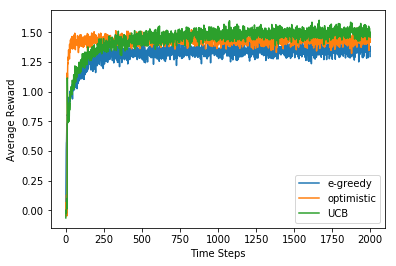

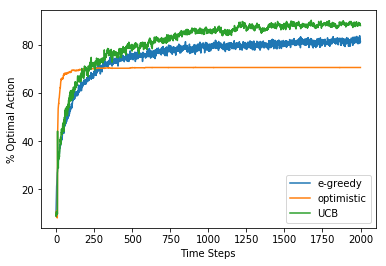

In [12]:
# Stationary + sample mean
bandit.plot_results()

In [13]:
# Non stationary + constant without bias on Q1

env = 'n'
step = "Constant"

bandit = KArmTestBed(num_simulations, time_steps, num_arms)
print("Test Conditions:\nNumber of Simulations per Test: {}\nNumber of Time Steps per Simulation: {}\nNumber of Arms: {}\n"
      .format(num_simulations, time_steps, num_arms))

tests = ["e-greedy", "optimistic", "UCB"]
for test in range(3):
    print("Running test {} - {}".format(
        test+1, tests[test]))
    bandit.add_test(tests[test])
    bandit.run_test()

Test Conditions:
Number of Simulations per Test: 1000
Number of Time Steps per Simulation: 2000
Number of Arms: 10

Running test 1 - e-greedy
Running test 2 - optimistic
Running test 3 - UCB


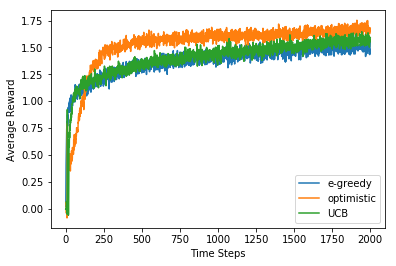

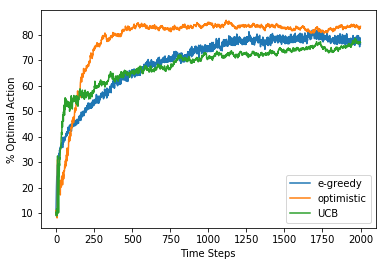

In [14]:
# Non stationary + constant without bias on Q1
bandit.plot_results()